In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.stats import multivariate_normal

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.utils import shuffle

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])



In [3]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    for i in range(num_features):
        median = X[i].median()
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = median
    return X_new
        
    
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X, alpha = 0.25):
    q25 = X.quantile(alpha, axis=0)
    q75 = X.quantile(1-alpha, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_11_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_11_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_11_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 20)
(1000,)
(10000, 20)


In [7]:
pd.DataFrame(X_train_load).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.042468,-0.033086,-0.005529,0.054143,0.014245,0.032539,-0.009645,0.010787,-0.053377,-0.016538,-0.047484,-0.033308,-0.020020,-0.017591,-0.067522,0.013534,-0.030464,0.003698,-0.000783,-0.064410
std,1.021183,0.982308,1.014234,0.950259,1.000361,0.998124,1.008284,0.991118,1.008160,0.993934,1.012489,0.993386,0.962257,0.991809,0.982905,0.963571,1.047724,0.999840,1.009764,0.974701
min,-3.325410,-3.053573,-3.527614,-2.862487,-2.961886,-2.637858,-3.132673,-3.646662,-3.511776,-4.135798,-3.335480,-3.558125,-3.035100,-3.689359,-3.169257,-2.997156,-3.249903,-3.274770,-3.024222,-3.663206
25%,-0.666140,-0.684727,-0.706011,-0.596563,-0.685630,-0.664661,-0.665505,-0.676832,-0.724360,-0.686041,-0.713737,-0.683707,-0.693254,-0.682489,-0.718520,-0.604808,-0.773741,-0.672606,-0.681743,-0.756117
50%,0.028518,-0.033021,-0.023356,0.034166,0.025118,0.024603,-0.013067,-0.019161,-0.078825,-0.014097,-0.051899,-0.049922,-0.030751,-0.001219,-0.016482,0.039562,-0.036194,-0.021975,0.010681,-0.034950
75%,0.721013,0.682240,0.707300,0.699918,0.667713,0.687578,0.644713,0.677472,0.611713,0.648095,0.664780,0.634722,0.621672,0.663375,0.599311,0.615307,0.694828,0.726782,0.672221,0.591585
max,3.514281,3.970436,3.608803,2.719529,3.099232,3.840840,2.890646,3.177667,2.930850,3.285870,3.877153,2.790109,2.936484,3.556809,3.068924,3.503933,2.903637,3.360040,2.996051,3.064670


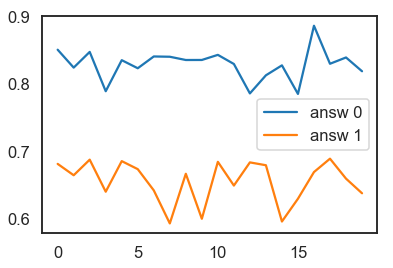

In [8]:
plt.plot(np.mean(np.abs(X_train_load[np.where(y_train_load==0)]), axis = 0), label = 'answ 0')
plt.plot(np.mean(np.abs(X_train_load[np.where(y_train_load==1)]), axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_11_FeatureMean.pdf')

In [9]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x1144cbb70>)

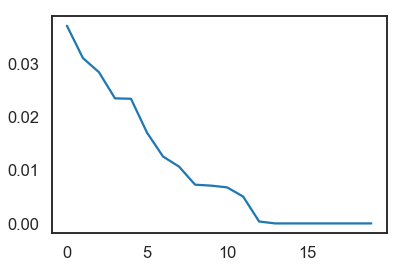

In [10]:
plt.plot(np.sort(skb.scores_)[::-1])

In [11]:
np.sort(skb.scores_)[::-1][:14]

array([ 0.0370227 ,  0.03096486,  0.0283191 ,  0.0234253 ,  0.02334478,
        0.01699664,  0.01252754,  0.01063673,  0.00725645,  0.00707752,
        0.00674851,  0.00502937,  0.00035419,  0.        ])

In [12]:
skb.k = 20

In [13]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)




In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 20)
(1000,)
(10000, 20)


In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-8090 -1000
191


In [16]:
X_train_new, y_train_new = ADASYN(n_neighbors=100).fit_sample(X_train, y_train)
# X_train_new = np.array(X_train)
# y_train_new = np.array(y_train)

# ind = np.random.choice(np.where(y_train == 0)[0], size = 448)
# X_train_new = np.vstack([X_train[np.where(y_train == 1)], X_train[ind]])
# y_train_new = np.hstack([y_train[np.where(y_train == 1)], y_train[ind]])

X_test_new = np.array(X_test)

In [17]:
print(X_train_new.shape, X_test_new.shape)

(1619, 20) (10000, 20)


In [18]:
print(_asy1(y_train_new, y_train_new), _asy2(y_train_new, y_train_new))
print(np.sum(y_train_new))

-8090 -1619
810


In [19]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.89005558987
AUC 0.960812769919
NUM 178
ASY1 -6392
ASY2 -1183


In [20]:
rho = 0.9
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)





ACC 0.780111179741
AUC 0.960812769919
NUM 356
ASY1 -7734
ASY2 -907


In [21]:
rho = 0.66
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.880172946263
AUC 0.960812769919
NUM 194
ASY1 -7174
ASY2 -1193


In [22]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_11_answ.csv', sep = ',')
